# Analiza držav
V tej projektni nalogi bom analizirala vse države na svetu. Podatke sem zajela na internetni strani https://www.geograf.in/en/table.php?col1=state&col2=continent&col3=area&col4=population&col5=gdp&col6=life&col7=government&col8=density&col9=religion&filter=0&order_by=state&ascdesc=ASC


In [42]:
import pandas as pd
pd.set_option('display.max_rows', 20)
%matplotlib inline
drzave = pd.read_csv('države_podatki/drzave.csv', index_col='ime')

In [43]:
drzave

,kontinent,območje (km2),populacija,gdp (USD per capita),življenska doba (leta),vlada,gostota (ljudi na km2),vera
ime,,,,,,,,
Afghanistan,Asia,647500,31575018,1976,64.0,presidential republic,49,Sunni Islam
Albania,Europe,28748,2821977,12943,78.5,republic with parliamentary system,98,Sunni Islam
Algeria,Africa,2381740,42545964,15292,76.3,semi-presidential republic,18,Sunni Islam
Andorra,Europe,468,76246,0,81.7,constitutional monarchy based on parlamentarism,163,Catholic Christianity
Angola,Africa,1246700,29250009,6657,61.8,presidential republic,23,Catholic Christianity and Natural religion
...,...,...,...,...,...,...,...,...
Vietnam,Asia,331212,94660000,6790,76.5,republic with single political movement,286,Mahayana Buddhism
Western Sahara,Africa,266000,567402,0,0.0,other,2,Sunni Islam
Yemen,Asia,527970,28915284,2606,65.2,other,55,Sunni and Shi'ite Islam


In [44]:
drzave.groupby("kontinent").size()

kontinent
Africa     55
America    35
Asia       46
Europe     46
Oceania    14
dtype: int64

<Axes: xlabel='kontinent'>

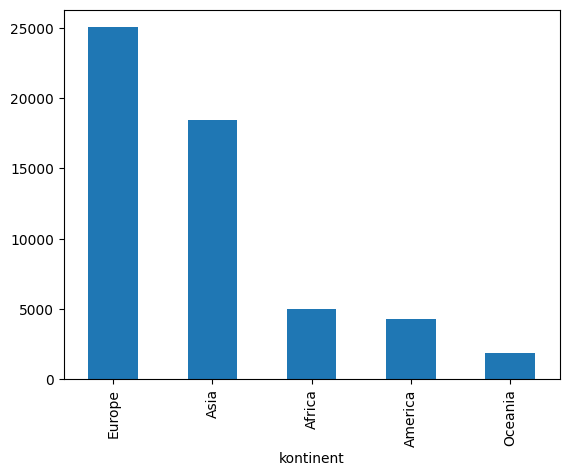

In [46]:
gostota_na_kontinentu = drzave.groupby(by="kontinent")["gostota (ljudi na km2)"].sum()
gostota_na_kontinentu.sort_values(inplace = True, ascending = False)
gostota_na_kontinentu.plot.bar()

<Axes: xlabel='kontinent'>

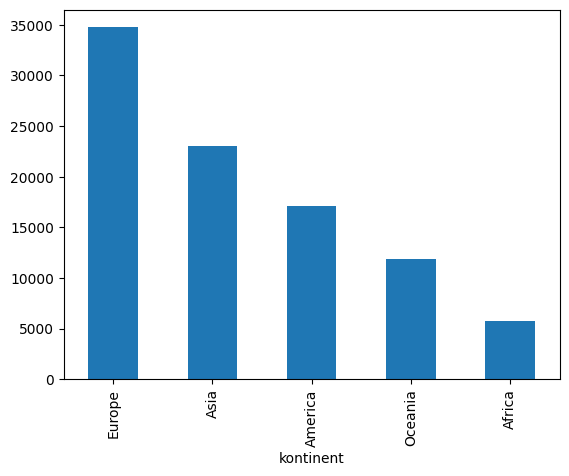

In [67]:
gdp_na_kontinentu = drzave.groupby(by="kontinent")["gdp (USD per capita)"].mean()
gdp_na_kontinentu.sort_values(inplace = True, ascending = False)
gdp_na_kontinentu.plot.bar()

<Axes: xlabel='kontinent'>

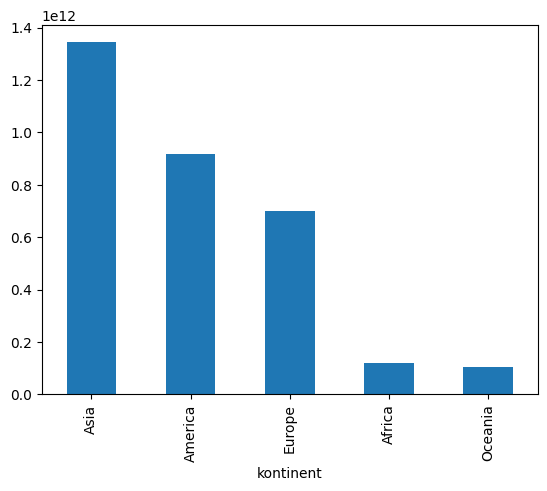

In [75]:
filter_gdp = (drzave['gdp (USD per capita)'] != 0)
podtabela1 = drzave[filter_gdp].copy()
podtabela1['total gdp'] = podtabela1['gdp (USD per capita)'] * podtabela1['populacija']
total_gdp_na_kontinentu = podtabela1.groupby(by="kontinent")["total gdp"].mean()
total_gdp_na_kontinentu.sort_values(inplace = True, ascending = False)
total_gdp_na_kontinentu.plot.bar()

<Axes: xlabel='življenska doba (leta)'>

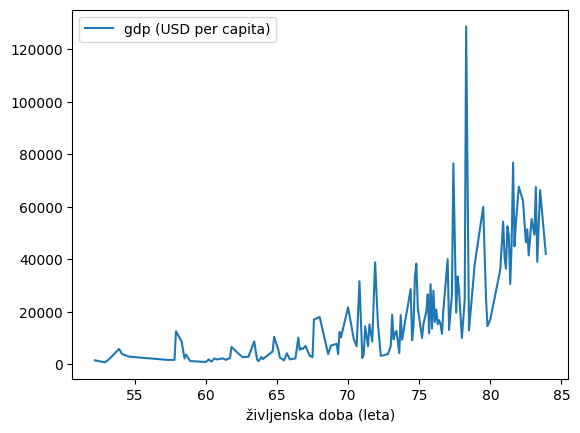

In [76]:
filter_doba = (drzave['življenska doba (leta)'] != 0)
podtabela2 = drzave[filter_doba & filter_gdp].copy()
podtabela2.groupby(by='življenska doba (leta)').agg({'gdp (USD per capita)':"mean"}).plot()

<Axes: xlabel='vera'>

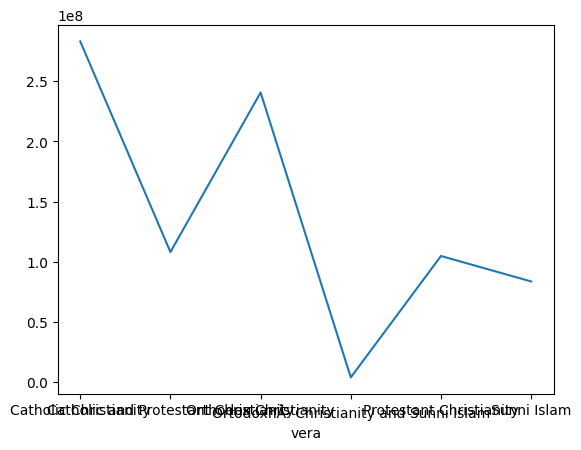

In [86]:
filter_evropa = (drzave['kontinent'] == 'Europe')
podtabela3 = drzave[filter_evropa].copy()
podtabela3.groupby('vera')['populacija'].sum().plot()